In [1]:
import time
import numpy

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

from nearpy import Engine
from nearpy.hashes import RandomDiscretizedProjections
from nearpy.filters import NearestFilter, UniqueFilter
from nearpy.distances import EuclideanDistance
from nearpy.experiments import DistanceRatioExperiment

# Set dimension and vector count for this experiment
dimension = 100
vector_count = 10000

# Create data set from two clusters
vectors = []

center = numpy.random.randn(dimension)
for index in range(int(vector_count/2)):
    vector = center + 0.01 * numpy.random.randn(dimension)
    vectors.append(vector)

center = numpy.random.randn(dimension)
for index in range(int(vector_count/2)):
    vector = center + 0.01 * numpy.random.randn(dimension)
    vectors.append(vector)

# We are looking for the ten closest neighbours
nearest = NearestFilter(10)
# We want unique candidates
unique = UniqueFilter()

# We will fill this array with all the engines we want to test
engines = []

print ('Creating engines...')

# We are going to test these bin widths
bin_widths = [ 0.0001 * x for x in range(1,20)]
# Create engines for all configurations
for bin_width in bin_widths:
    # Use four random 1-dim discretized projections
    rdp1 = RandomDiscretizedProjections('rdp1', 1, bin_width)
    rdp2 = RandomDiscretizedProjections('rdp2', 1, bin_width)
    rdp3 = RandomDiscretizedProjections('rdp3', 1, bin_width)
    rdp4 = RandomDiscretizedProjections('rdp4', 1, bin_width)

    # Create engine with this configuration
    engine = Engine(dimension, lshashes=[rdp1, rdp2, rdp3, rdp4],
                    vector_filters=[unique, nearest])

    # Add engine to list of engines to evaluate
    engines.append(engine)

print ('Creating experiment and performing exact search...')

# Create experiment (looking for ten closest neighbours).
# The constructor performs exact search for evaluation.
# So the data set should not be too large for experiments.
exp = DistanceRatioExperiment(10, vectors, coverage_ratio=0.2)

print ('Performing experiment for all engines...')

# Perform experiment for all engines
result = exp.perform_experiment(engines)

print ('Plotting resulting graph...')

# Collect these measures from all result items
distance_ratios = []
searchtimes = []
resultsizes= []

for item in result:
    distance_ratios.append(item[0])
    resultsizes.append(item[1])
    searchtimes.append(item[2])




Creating engines...
Creating experiment and performing exact search...

Starting exact search (query set size=2000)...

\Done with exact search...

Performing experiment for all engines...
Engine 0 / 19
  distance_ratio=0.000000, result_size=6.528000, time=0.015056
Engine 1 / 19
  distance_ratio=0.000000, result_size=9.288500, time=0.018170
Engine 2 / 19
  distance_ratio=0.000000, result_size=9.907500, time=0.021537
Engine 3 / 19
  distance_ratio=0.000000, result_size=9.981500, time=0.024921
Engine 4 / 19
  distance_ratio=0.000000, result_size=9.988000, time=0.028418
Engine 5 / 19
  distance_ratio=0.000000, result_size=9.999000, time=0.029979
Engine 6 / 19
  distance_ratio=0.000000, result_size=9.998500, time=0.034389
Engine 7 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.035387
Engine 8 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.039100
Engine 9 / 19
  distance_ratio=0.000000, result_size=10.000000, time=0.044271
Engine 10 / 19
  distance_ratio=0.0000

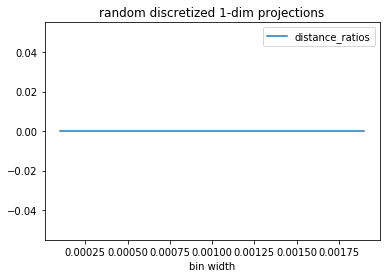

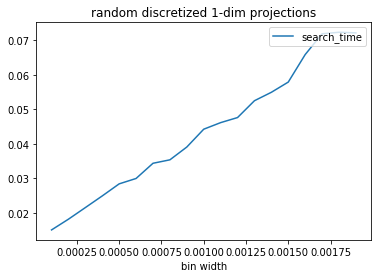

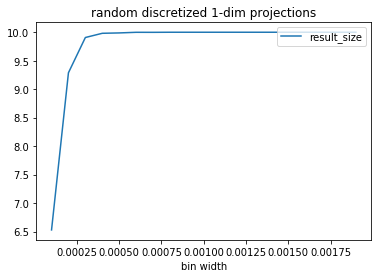

In [2]:
# Plot measures
ticks = bin_widths
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, distance_ratios)
ax.legend(['distance_ratios'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('distance_ratios.png')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, searchtimes)
ax.legend(['search_time'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('times.png')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, resultsizes)
ax.legend(['result_size'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('result_sizes.png')